In [1]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('capstone train data.csv')
train_data.info()

In [3]:
train_data.head()

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,logistic_order_id,action,facility_id,facility_type,city_id,logistic_company_id,timestamp
0,20170119,111473428,237918:1:83.89,2017-01-19 19:58:00,8077034,3.0,1,312,5.0,20170119,124235797,SIGNED,140041.0,1.0,133.0,149,2017-01-21 11:31:00
1,20170102,77152998,64416:1:96.77,2017-01-02 16:19:00,9586077,0.0,1,65,5.0,20170102,11690786,SIGNED,30891.0,1.0,145.0,431,2017-01-03 15:33:00
2,20170110,2715563,191720:1:93.88,2017-01-10 12:11:00,402314,2.0,1,286,5.0,20170110,23453179,SIGNED,57382.0,1.0,278.0,149,2017-01-11 14:26:00
3,20170106,99105693,118924:1:2151.77,2017-01-06 19:25:00,15132063,0.0,1,360,5.0,20170106,68620555,SIGNED,109261.0,1.0,248.0,674,2017-01-08 13:08:00
4,20170115,67804349,38889:1:132.59,2017-01-15 09:20:00,18819036,1.0,1,253,5.0,20170115,54564707,SIGNED,30359.0,1.0,278.0,149,2017-01-15 15:48:00


In [4]:
import datetime

In [5]:
for index, row in train_data.iterrows():
    total_minutes = 0
    if row['action'] == 'SIGNED':
        order_time = datetime.datetime.strptime(row['pay_timestamp'], '%Y-%m-%d %H:%M:%S')
        sign_time = datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')
        diff = sign_time - order_time
        total_minutes += diff.total_seconds() / 60
        train_data.loc[index, 'shipping_time'] = total_minutes

In [6]:
data1 = train_data
data1['shipping_time'] = data1.groupby('order_id')['shipping_time'].fillna(method='ffill')

In [7]:
data = data1
data['time_difference'] = data['promise_speed']*24*60 - data['shipping_time']

In [8]:
groups = data.groupby('order_id')

In [ ]:
new_df = pd.DataFrame(columns=['order_id', 'item_id', 'quantity', 'payment_amount', 'Logistics_review_score'])

# Loop through the groups and split the item_detail_info column
for name, group in groups:
    for row in group.itertuples(index=False):
        rating = row.Logistics_review_score
        order_detail = row.item_det_info
        items = order_detail.split(';')
        for item in items:
            item_id, quantity, payment_amount = item.split(':')
            new_df = new_df.append({'order_id': name, 'item_id': item_id, 'quantity': quantity, 'payment_amount': payment_amount, 'Logistics_review_score': rating}, ignore_index=True)

In [10]:
new_df

,order_id,item_id,quantity,payment_amount,Logistics_review_score
0,2839,101006,1,115.64,5.0
1,4391,187506,1,27.71,5.0
2,4688,24895,1,200.96,5.0
3,9279,190989,1,118.61,5.0
4,10377,191720,1,93.88,5.0
...,...,...,...,...,...
74729,137117932,134106,1,33.46,5.0
74730,137120912,200627,1,96.65,5.0
74731,137126251,196729,1,14.38,5.0
74732,137126687,95314,1,27.79,5.0


In [11]:
new_df = new_df.drop_duplicates()
merge = pd.merge(data, new_df, on='order_id')

In [12]:
merge = merge.drop(['Logistics_review_score_y'], axis=1)
data = merge.rename(columns={'Logistics_review_score_x': 'Logistics_review_score'})

In [13]:
data['is_high_usage'] = 0

In [14]:
data.loc[data['logistic_company_id'].isin([184, 431, 674, 29, 149]), 'is_high_usage'] = 1
data.loc[~data['logistic_company_id'].isin([184, 431, 674, 29, 149]), 'is_high_usage'] = 0

In [15]:
data.head()

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,...,facility_type,city_id,logistic_company_id,timestamp,shipping_time,time_difference,item_id,quantity,payment_amount,is_high_usage
0,20170119,111473428,237918:1:83.89,2017-01-19 19:58:00,8077034,3.0,1,312,5.0,20170119,...,1.0,133.0,149,2017-01-21 11:31:00,2373.0,1947.0,237918,1,83.89,1
1,20170102,77152998,64416:1:96.77,2017-01-02 16:19:00,9586077,0.0,1,65,5.0,20170102,...,1.0,145.0,431,2017-01-03 15:33:00,1394.0,-1394.0,64416,1,96.77,1
2,20170110,2715563,191720:1:93.88,2017-01-10 12:11:00,402314,2.0,1,286,5.0,20170110,...,1.0,278.0,149,2017-01-11 14:26:00,1575.0,1305.0,191720,1,93.88,1
3,20170106,99105693,118924:1:2151.77,2017-01-06 19:25:00,15132063,0.0,1,360,5.0,20170106,...,1.0,248.0,674,2017-01-08 13:08:00,2503.0,-2503.0,118924,1,2151.77,1
4,20170115,67804349,38889:1:132.59,2017-01-15 09:20:00,18819036,1.0,1,253,5.0,20170115,...,1.0,278.0,149,2017-01-15 15:48:00,388.0,1052.0,38889,1,132.59,1


In [16]:
data1=data[['order_id','promise_speed','shipping_time','action','if_cainiao','time_difference','Logistics_review_score','quantity','payment_amount','is_high_usage']]
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74850 entries, 0 to 74849
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                74850 non-null  object 
 1   promise_speed           74850 non-null  float64
 2   shipping_time           74850 non-null  float64
 3   action                  74850 non-null  object 
 4   if_cainiao              74850 non-null  int64  
 5   time_difference         74850 non-null  float64
 6   Logistics_review_score  74850 non-null  float64
 7   quantity                74850 non-null  object 
 8   payment_amount          74850 non-null  object 
 9   is_high_usage           74850 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 6.3+ MB


In [17]:
data1['isSatisfied']=[1 if i>=3.5 else 0 for i in data1['Logistics_review_score']]

/var/folders/0r/_568dtlx1ksbtyyp1djps8j80000gn/T/ipykernel_97869/4111824734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['isSatisfied']=[1 if i>=3.5 else 0 for i in data1['Logistics_review_score']]


In [18]:
data1.head()

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,quantity,payment_amount,is_high_usage,isSatisfied
0,111473428,3.0,2373.0,SIGNED,1,1947.0,5.0,1,83.89,1,1
1,77152998,0.0,1394.0,SIGNED,1,-1394.0,5.0,1,96.77,1,1
2,2715563,2.0,1575.0,SIGNED,1,1305.0,5.0,1,93.88,1,1
3,99105693,0.0,2503.0,SIGNED,1,-2503.0,5.0,1,2151.77,1,1
4,67804349,1.0,388.0,SIGNED,1,1052.0,5.0,1,132.59,1,1


<AxesSubplot:>

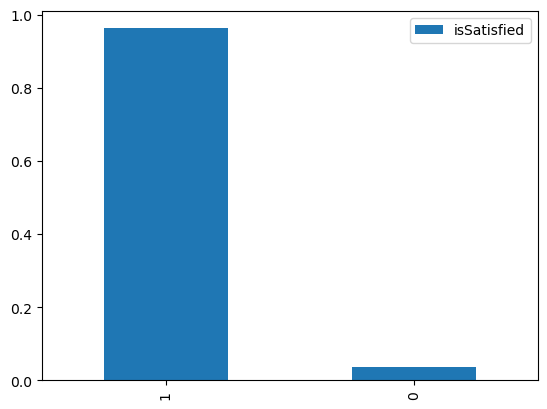

In [19]:
fc = data1['isSatisfied'].value_counts(normalize=True).to_frame()
fc.plot.bar()

<AxesSubplot:>

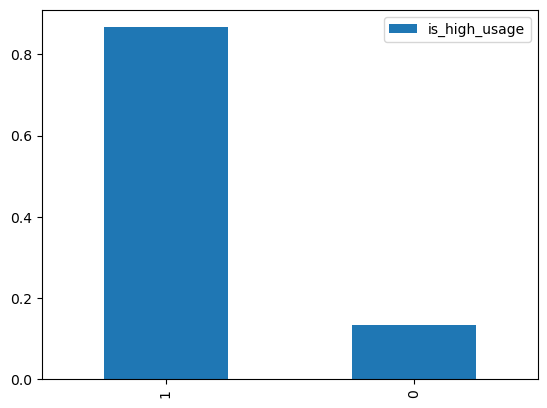

In [20]:
fc = data1['is_high_usage'].value_counts(normalize=True).to_frame()
fc.plot.bar()

In [21]:
data1.fillna(method='ffill')

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,quantity,payment_amount,is_high_usage,isSatisfied
0,111473428,3.0,2373.0,SIGNED,1,1947.0,5.0,1,83.89,1,1
1,77152998,0.0,1394.0,SIGNED,1,-1394.0,5.0,1,96.77,1,1
2,2715563,2.0,1575.0,SIGNED,1,1305.0,5.0,1,93.88,1,1
3,99105693,0.0,2503.0,SIGNED,1,-2503.0,5.0,1,2151.77,1,1
4,67804349,1.0,388.0,SIGNED,1,1052.0,5.0,1,132.59,1,1
...,...,...,...,...,...,...,...,...,...,...,...
74845,95901176,0.0,6990.0,SIGNED,0,-6990.0,5.0,1,12.56,1,1
74846,72663377,3.0,2433.0,SIGNED,1,1887.0,5.0,1,24.12,1,1
74847,3301855,2.0,1675.0,SIGNED,1,1205.0,5.0,1,18.43,0,1
74848,106363918,2.0,1328.0,SIGNED,1,1552.0,5.0,1,26.97,1,1


In [22]:
data1 = data1.replace(['', 'nan'], np.nan)
data1 = data1.fillna(0)
data1

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,quantity,payment_amount,is_high_usage,isSatisfied
0,111473428,3.0,2373.0,SIGNED,1,1947.0,5.0,1,83.89,1,1
1,77152998,0.0,1394.0,SIGNED,1,-1394.0,5.0,1,96.77,1,1
2,2715563,2.0,1575.0,SIGNED,1,1305.0,5.0,1,93.88,1,1
3,99105693,0.0,2503.0,SIGNED,1,-2503.0,5.0,1,2151.77,1,1
4,67804349,1.0,388.0,SIGNED,1,1052.0,5.0,1,132.59,1,1
...,...,...,...,...,...,...,...,...,...,...,...
74845,95901176,0.0,6990.0,SIGNED,0,-6990.0,5.0,1,12.56,1,1
74846,72663377,3.0,2433.0,SIGNED,1,1887.0,5.0,1,24.12,1,1
74847,3301855,2.0,1675.0,SIGNED,1,1205.0,5.0,1,18.43,0,1
74848,106363918,2.0,1328.0,SIGNED,1,1552.0,5.0,1,26.97,1,1


In [23]:
data1.head()

,order_id,promise_speed,shipping_time,action,if_cainiao,time_difference,Logistics_review_score,quantity,payment_amount,is_high_usage,isSatisfied
0,111473428,3.0,2373.0,SIGNED,1,1947.0,5.0,1,83.89,1,1
1,77152998,0.0,1394.0,SIGNED,1,-1394.0,5.0,1,96.77,1,1
2,2715563,2.0,1575.0,SIGNED,1,1305.0,5.0,1,93.88,1,1
3,99105693,0.0,2503.0,SIGNED,1,-2503.0,5.0,1,2151.77,1,1
4,67804349,1.0,388.0,SIGNED,1,1052.0,5.0,1,132.59,1,1


In [24]:
#test set prep

In [25]:
test_data = pd.read_csv('capstone test data.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     30000 non-null  int64  
 1   order_id                30000 non-null  int64  
 2   item_det_info           30000 non-null  object 
 3   pay_timestamp           30000 non-null  object 
 4   buyer_id                30000 non-null  int64  
 5   promise_speed           30000 non-null  float64
 6   if_cainiao              30000 non-null  int64  
 7   merchant_id             30000 non-null  int64  
 8   Logistics_review_score  30000 non-null  float64
 9   order_date              30000 non-null  int64  
 10  logistic_order_id       30000 non-null  int64  
 11  action                  30000 non-null  object 
 12  facility_id             30000 non-null  float64
 13  facility_type           30000 non-null  float64
 14  city_id                 30000 non-null

In [26]:
for index, row in test_data.iterrows():
    total_minutes = 0
    if row['action'] == 'SIGNED':
        order_time = datetime.datetime.strptime(row['pay_timestamp'], '%Y-%m-%d %H:%M:%S')
        sign_time = datetime.datetime.strptime(row['timestamp'], '%Y-%m-%d %H:%M:%S')
        diff = sign_time - order_time
        total_minutes += diff.total_seconds() / 60
        test_data.loc[index, 'shipping_time'] = total_minutes

In [27]:
data2 = test_data
data1['shipping_time'] = data1.groupby('order_id')['shipping_time'].fillna(method='ffill')

In [28]:
data_test = data2
data_test['time_difference'] = data_test['promise_speed']*24*60 - data_test['shipping_time']

In [29]:
groups2 = data_test.groupby('order_id')

In [ ]:
new_df = pd.DataFrame(columns=['order_id', 'item_id', 'quantity', 'payment_amount', 'Logistics_review_score'])

# Loop through the groups and split the item_detail_info column
for name, group in groups2:
    for row in group.itertuples(index=False):
        rating = row.Logistics_review_score
        order_detail = row.item_det_info
        items = order_detail.split(';')
        for item in items:
            item_id, quantity, payment_amount = item.split(':')
            new_df = new_df.append({'order_id': name, 'item_id': item_id, 'quantity': quantity, 'payment_amount': payment_amount, 'Logistics_review_score': rating}, ignore_index=True)

In [31]:
new_df = new_df.drop_duplicates()
merge = pd.merge(data_test, new_df, on='order_id')

In [32]:
merge = merge.drop(['Logistics_review_score_y'], axis=1)
test_data = merge.rename(columns={'Logistics_review_score_x': 'Logistics_review_score'})

In [33]:
test_data['is_high_usage'] = 0

In [34]:
test_data.loc[test_data['logistic_company_id'].isin([184, 431, 674, 29, 149]), 'is_high_usage'] = 1
test_data.loc[~test_data['logistic_company_id'].isin([184, 431, 674, 29, 149]), 'is_high_usage'] = 0

In [35]:
test_data['isSatisfied']=[1 if i>=3.5 else 0 for i in test_data['Logistics_review_score']]

In [36]:
test_data.fillna(method='ffill')

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,...,city_id,logistic_company_id,timestamp,shipping_time,time_difference,item_id,quantity,payment_amount,is_high_usage,isSatisfied
0,20170117,51691609,221985:1:103.68,2017-01-17 10:04:00,41755196,0.0,1,286,5.0,20170117,...,210.0,431,2017-01-19 12:59:00,3055.0,-3055.0,221985,1,103.68,1,1
1,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,101013,1,9.48,1,1
2,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,128735,3,56.6,1,1
3,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,19403,1,8.56,1,1
4,20170104,22497297,160159:1:99.72,2017-01-04 08:51:00,75417160,2.0,1,339,5.0,20170104,...,136.0,132,2017-01-05 19:04:00,2053.0,827.0,160159,1,99.72,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31967,20170129,19652946,191720:1:93.88,2017-01-29 12:55:00,63806629,0.0,1,286,5.0,20170129,...,312.0,674,2017-02-06 14:07:00,11592.0,-11592.0,191720,1,93.88,1,1
31968,20170104,36716084,84060:1:35.27,2017-01-04 12:10:00,8502892,0.0,1,225,5.0,20170104,...,145.0,431,2017-01-06 14:00:00,2990.0,-2990.0,84060,1,35.27,1,1
31969,20170106,34612915,266359:1:1006.28,2017-01-06 21:38:00,60620045,3.0,1,159,5.0,20170106,...,273.0,149,2017-01-08 14:20:00,2442.0,1878.0,266359,1,1006.28,1,1
31970,20170124,44155681,181120:1:18.31,2017-01-24 23:21:00,12466575,0.0,1,134,5.0,20170124,...,229.0,149,2017-01-26 18:27:00,2586.0,-2586.0,181120,1,18.31,1,1


In [37]:
data_testing = test_data.replace(['', 'nan'], np.nan)
data_testing = test_data.fillna(0)
data_testing 

,day,order_id,item_det_info,pay_timestamp,buyer_id,promise_speed,if_cainiao,merchant_id,Logistics_review_score,order_date,...,city_id,logistic_company_id,timestamp,shipping_time,time_difference,item_id,quantity,payment_amount,is_high_usage,isSatisfied
0,20170117,51691609,221985:1:103.68,2017-01-17 10:04:00,41755196,0.0,1,286,5.0,20170117,...,210.0,431,2017-01-19 12:59:00,3055.0,-3055.0,221985,1,103.68,1,1
1,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,101013,1,9.48,1,1
2,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,128735,3,56.6,1,1
3,20170108,124488158,101013:1:9.48;128735:3:56.6;19403:1:8.56,2017-01-08 14:16:00,53290235,3.0,1,12,5.0,20170108,...,213.0,149,2017-01-09 18:27:00,1691.0,2629.0,19403,1,8.56,1,1
4,20170104,22497297,160159:1:99.72,2017-01-04 08:51:00,75417160,2.0,1,339,5.0,20170104,...,136.0,132,2017-01-05 19:04:00,2053.0,827.0,160159,1,99.72,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31967,20170129,19652946,191720:1:93.88,2017-01-29 12:55:00,63806629,0.0,1,286,5.0,20170129,...,312.0,674,2017-02-06 14:07:00,11592.0,-11592.0,191720,1,93.88,1,1
31968,20170104,36716084,84060:1:35.27,2017-01-04 12:10:00,8502892,0.0,1,225,5.0,20170104,...,145.0,431,2017-01-06 14:00:00,2990.0,-2990.0,84060,1,35.27,1,1
31969,20170106,34612915,266359:1:1006.28,2017-01-06 21:38:00,60620045,3.0,1,159,5.0,20170106,...,273.0,149,2017-01-08 14:20:00,2442.0,1878.0,266359,1,1006.28,1,1
31970,20170124,44155681,181120:1:18.31,2017-01-24 23:21:00,12466575,0.0,1,134,5.0,20170124,...,229.0,149,2017-01-26 18:27:00,2586.0,-2586.0,181120,1,18.31,1,1


In [38]:
#traintest split
from sklearn.model_selection import train_test_split

y_train = data1['isSatisfied']
X_train = data1[['promise_speed','shipping_time','if_cainiao','time_difference','payment_amount','is_high_usage']]

y_test = data_testing['isSatisfied']
X_test = data_testing[['promise_speed','shipping_time','if_cainiao','time_difference','payment_amount','is_high_usage']]

In [39]:
X_test.head()

,promise_speed,shipping_time,if_cainiao,time_difference,payment_amount,is_high_usage
0,0.0,3055.0,1,-3055.0,103.68,1
1,3.0,1691.0,1,2629.0,9.48,1
2,3.0,1691.0,1,2629.0,56.6,1
3,3.0,1691.0,1,2629.0,8.56,1
4,2.0,2053.0,1,827.0,99.72,0


**LINEAR DISCRIMINANT ANALYSIS ON IS-SATISFIED**

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [41]:
y_pred_lda = lda.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix
lda_confusion = confusion_matrix(y_test, y_pred_lda).ravel()

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lda)

0.9595583635681221

**logistic regression**

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[    1  1209]
 [    3 30759]]

Accuracy: 0.9620918303515577


**BOOTSTRAPPING***

In [46]:
#create function for the metric I am using (TPR)
def tpr(predictions):
    cm= confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return tp/(tp + fn)
def fpr(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return fp/(fp + tn)
def acc(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return (tp+tn)/(tp+fp+tn+fn)
def pre(predictions):
    cm = confusion_matrix(y_test, predictions)
    tn=cm[0,0]
    fn=cm[1,0]
    fp=cm[0,1]
    tp=cm[1,1]
    return tp/(tp+fp)

In [47]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=50):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter] = metrics(bs_predicted)
# if bs_iter % 100 == 0:
# print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [48]:
#bs_output = bootstrap_validation(X_test,y_test,y_train,logreg, metrics_list=[tpr,fpr,acc],sample = 5000)

In [49]:
print("True positive for Logisitic regression is",tpr(y_pred) )
print("False positive for Logisitic regression is",fpr(y_pred) )
print("Accuracy for Logisitic regression is",acc(y_pred) )
print("PRE for Logisitic regression is",pre(y_pred) )

True positive for Logisitic regression is 0.9999024770821143
False positive for Logisitic regression is 0.9991735537190083
Accuracy for Logisitic regression is 0.9620918303515577
PRE for Logisitic regression is 0.9621809309309309


In [50]:
print("True positive for LDA is",tpr(y_pred_lda) )
print("False positive for LDA is",fpr(y_pred_lda) )
print("Accuracy for LDA is",acc(y_pred_lda))
print("PRE for LDA is",pre(y_pred_lda))

True positive for LDA is 0.9960990832845719
False positive for LDA is 0.9694214876033058
Accuracy for LDA is 0.9595583635681221
PRE for LDA is 0.9631305987741632


***GRADIENT BOOST CLASSIFIER***

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [52]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

In [53]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [54]:
y_pred_gbc = gbc.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = gbc.predict_proba(X_test)
y_pred_gbc = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
cm = confusion_matrix(y_test, y_pred_gbc)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_gbc))

Confusion Matrix: 
 [[    1  1209]
 [    9 30753]]

Accuracy: 0.9619041661453772


In [56]:
accuracy = gbc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.9619041661453772


In [57]:
print("True positive for Gradientboostclassifier is",tpr(y_pred) )
print("False positive for Gradientboostclassifier is",fpr(y_pred) )
print("Accuracy for Gradientboostclassifier is",acc(y_pred) )
print("PRE for Gradientboostclassifier is",pre(y_pred) )

True positive for Gradientboostclassifier is 0.9999024770821143
False positive for Gradientboostclassifier is 0.9991735537190083
Accuracy for Gradientboostclassifier is 0.9620918303515577
PRE for Gradientboostclassifier is 0.9621809309309309


***GRADIENT BOOSTING REGRESSOR***